In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, get_sun, GeocentricTrueEcliptic, Angle
from astropy.wcs import WCS
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors

In [2]:
%matplotlib inline

In [3]:
rcParams['figure.figsize'] = 12, 9

In [4]:
import astroimsim

In [5]:
from imp import reload

In [6]:
reload(astroimsim)

<module 'astroimsim' from '/mnt/data/ajh/Documents/Spaaaaaaaaaaaaaaaaaaaaaace/HuntsmanInSpace/Simulations/astroimsim/astroimsim.py'>

In [7]:
zl = astroimsim.ZodiacalLight()

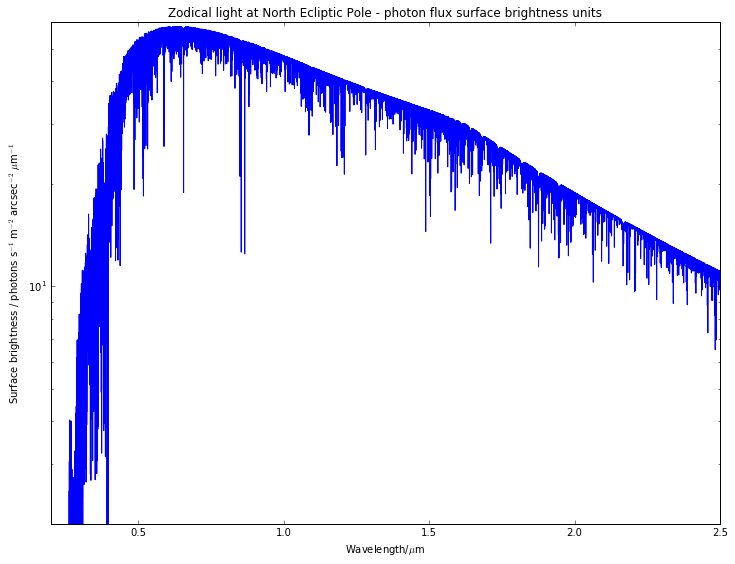

In [8]:
plt.semilogy(zl.waves, zl.photon_sfd, label='Zodical Light - NEP')
plt.xlim(0.2,2.5)
plt.ylim(2e-0,6e1)
plt.xlabel('Wavelength/$\mu$m')
plt.ylabel('Surface brightness / photons s$^{-1}$ m$^{-2}$ arcsec$^{-2}$ $\mu$m$^{-1}$')
plt.title('Zodical light at North Ecliptic Pole - photon flux surface brightness units');

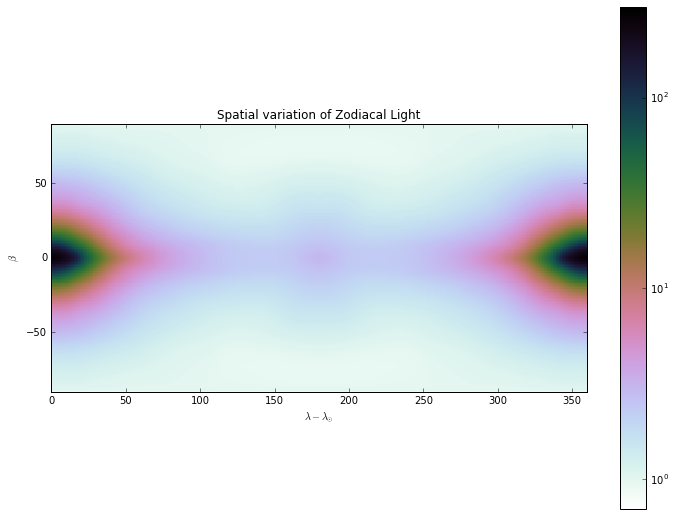

In [9]:
plt.imshow(zl._spatial(np.linspace(0,np.pi,180),np.linspace(0,2*np.pi,360)), \
           origin='lower', extent=[0,360,-90,90], norm=colors.LogNorm(vmin=0.7,vmax=300), \
           interpolation='none', cmap='cubehelix_r')
plt.colorbar()
plt.title('Spatial variation of Zodiacal Light')
plt.xlabel('$\lambda - \lambda_{\odot}$')
plt.ylabel('$\\beta$')

In [10]:
s = SkyCoord('4h30m00s -55d00m00s')

In [11]:
t = Time.now()

In [12]:
t

<Time object: scale='utc' format='datetime' value=2016-03-04 03:58:10.441283>

In [13]:
zl.relative_brightness(s, t)

array(1.1531050664971167)

In [14]:
zl.relative_brightness('4h30m00s -55d00m00s', t)

array(1.1531050664971167)

In [15]:
zl.relative_brightness('16h00m00s +57d30m00s', t)

array(0.9389044750773005)

In [16]:
zl.relative_brightness('16h00m00s +57d30m00s', '2016-02-19 14:02:58.288886')

array(0.9490916490120216)

In [17]:
s2 = SkyCoord(('16h00m00s +57d30m00s', '4h30m00s -55d00m00s'))

In [18]:
s2 = s2.transform_to(GeocentricTrueEcliptic(equinox=t))

In [19]:
zl.relative_brightness(s2, t)

array([ 0.93890448,  1.15310507])

In [20]:
ase = astroimsim.Imager(2000, 1504, 3 * u.arcsecond)

In [21]:
ase.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 0.0  0.0  
CRPIX : 1000.5  752.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00083333333333333328  0.00083333333333333328  
NAXIS    : 2000 1504

In [22]:
w = ase.get_pixel_coords('4h30m00s -55d00m00s')

In [23]:
w.shape

(1504, 2000)

In [24]:
rb = zl.relative_brightness(w, t)

In [25]:
rb.shape

(1504, 2000)

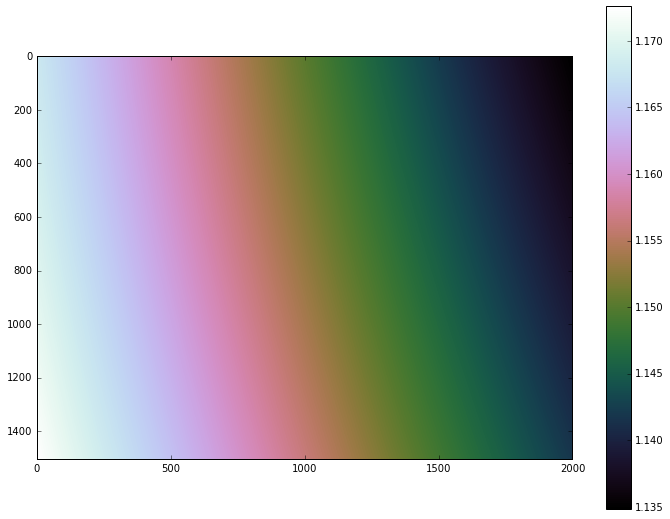

In [26]:
plt.imshow(rb, interpolation='none', aspect='equal', cmap='cubehelix')
plt.colorbar()